# Análise de Comensais (2022–2024)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df = pd.read_csv('../data/raw/comensais22-24 - Planilha1.csv')
df['Data'] = pd.to_datetime(df['Data'])
df.head()

,Data,Comensais_almoço,Comensais_janta
0,2022-03-16,315.0,100.0
1,2022-03-17,220.0,110.0
2,2022-03-18,350.0,120.0
3,2022-03-21,400.0,200.0
4,2022-03-22,330.0,260.0


## Limpeza e Preparação

In [5]:
df.info()
df.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              437 non-null    datetime64[ns]
 1   Comensais_almoço  436 non-null    float64       
 2   Comensais_janta   433 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 10.4 KB


['Data', 'Comensais_almoço', 'Comensais_janta']

In [6]:
df.describe()

,Data,Comensais_almoço,Comensais_janta
count,437,436.000000,433.000000
mean,2023-05-25 06:58:29.382151168,331.708716,249.609700
min,2022-03-16 00:00:00,40.000000,25.000000
25%,2022-09-20 00:00:00,300.000000,210.000000
50%,2023-05-29 00:00:00,350.000000,270.000000
75%,2023-11-28 00:00:00,390.000000,300.000000
max,2024-10-04 00:00:00,470.000000,400.000000
std,NaN,86.084001,77.744046


In [7]:
df.isna().sum()


Data                0
Comensais_almoço    1
Comensais_janta     4
dtype: int64

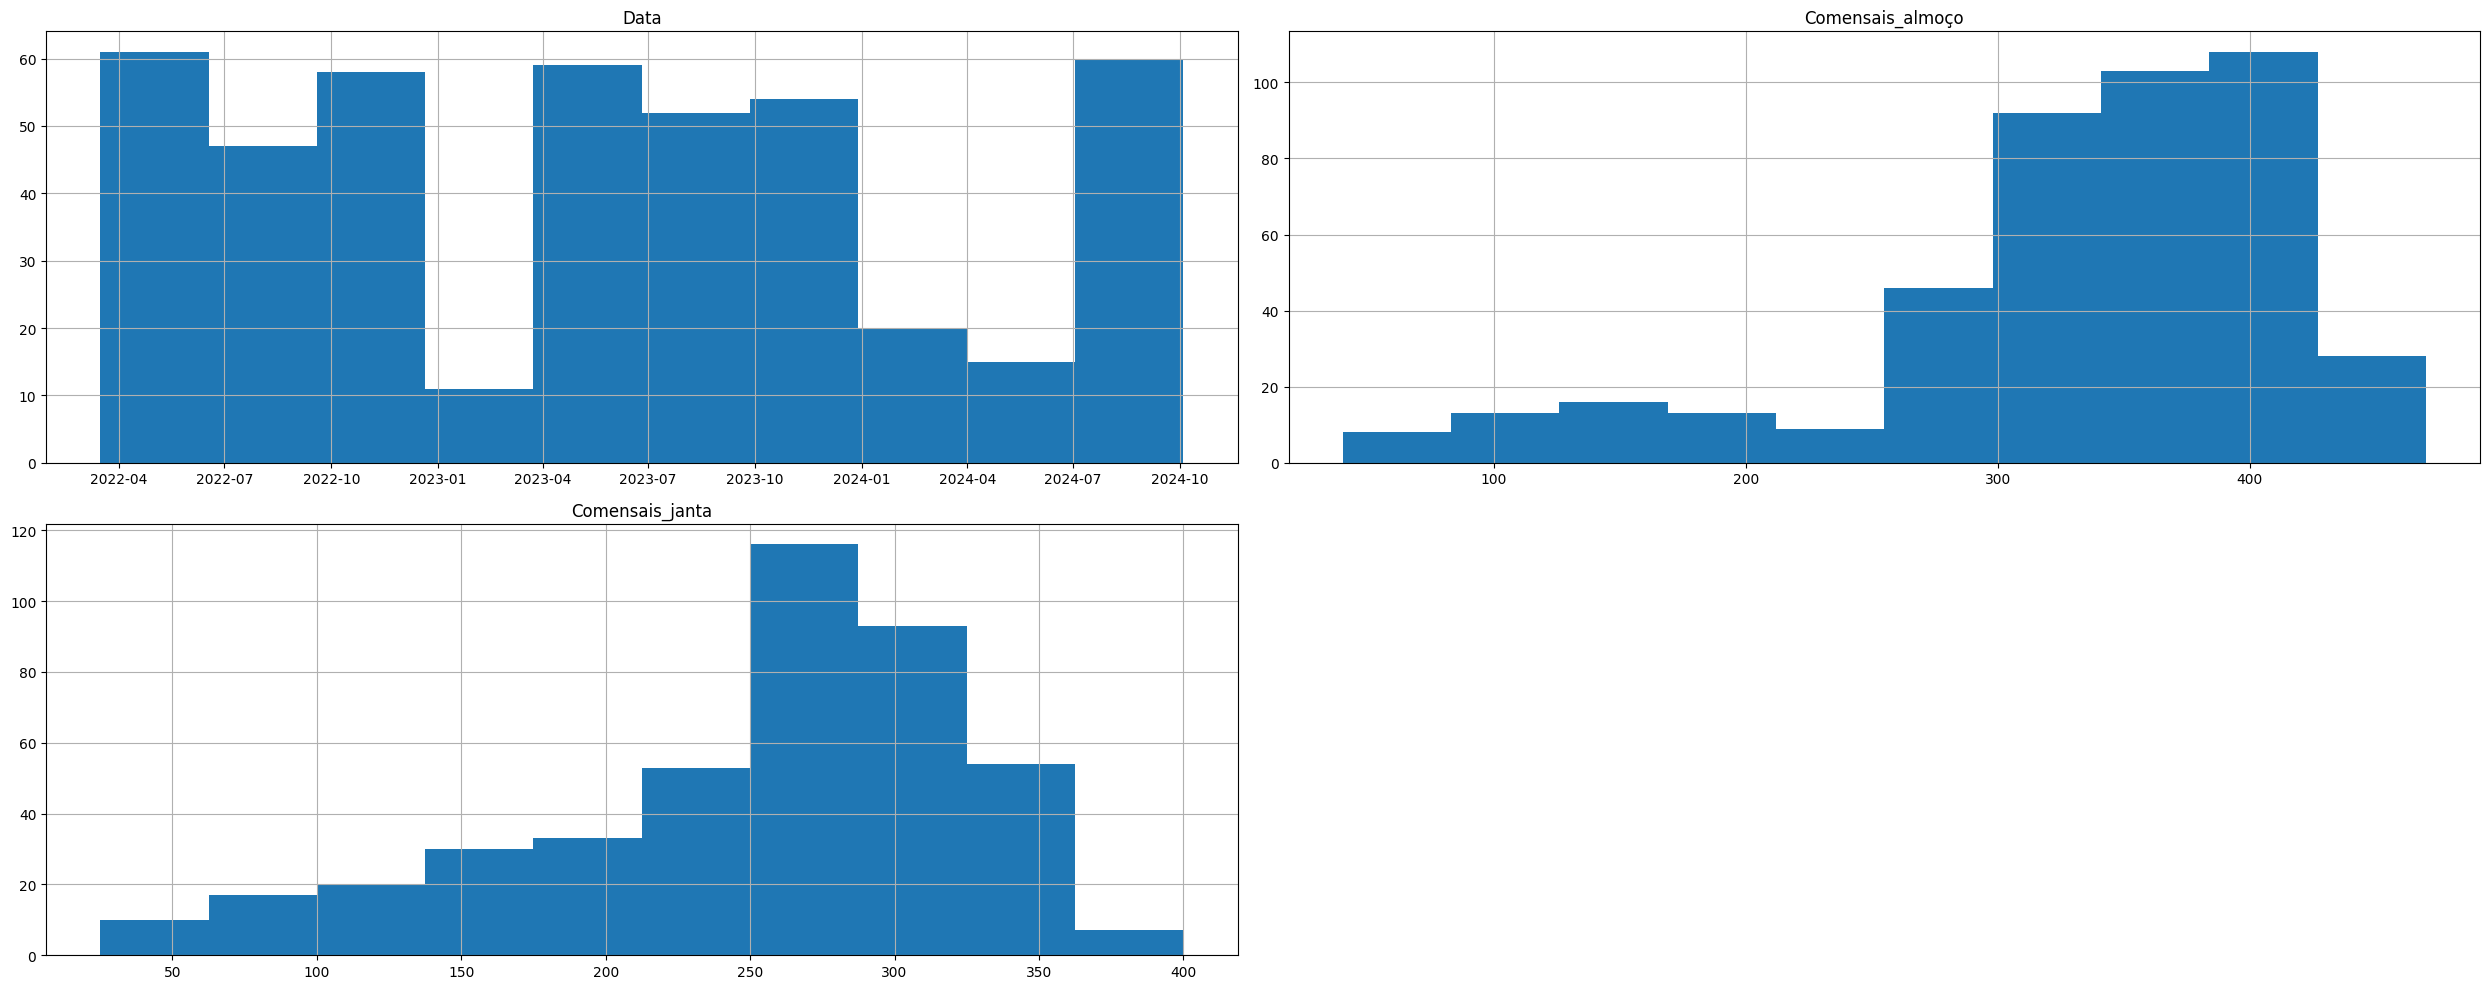

In [8]:
df.hist(figsize=(25,10))
plt.tight_layout()
plt.show()




## Correlações

Text(0.5, 1.0, 'Mapa de Correlação')

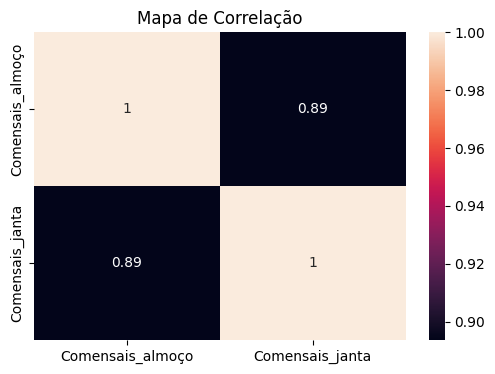

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Comensais_almoço','Comensais_janta']].corr(), annot=True)
plt.title('Mapa de Correlação')

## Série Temporal

Text(0.5, 1.0, 'Comensais ao longo do tempo')

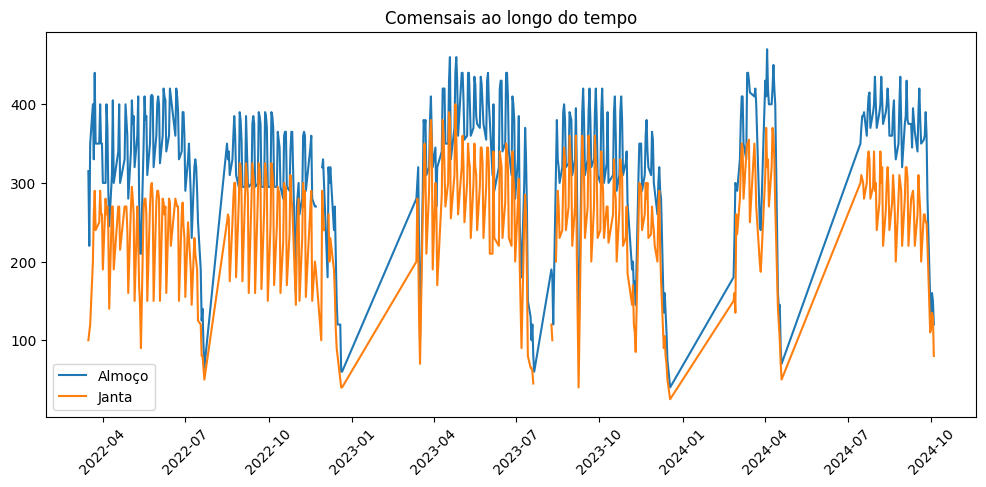

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df['Data'], df['Comensais_almoço'], label='Almoço')
plt.plot(df['Data'], df['Comensais_janta'], label='Janta')
plt.legend(); plt.xticks(rotation=45); plt.title('Comensais ao longo do tempo')

## Média Móvel (7 e 30 dias)

In [11]:
df = df.sort_values('Data')
df['MM7_almoço'] = df['Comensais_almoço'].rolling(7).mean()
df['MM30_almoço'] = df['Comensais_almoço'].rolling(30).mean()
df['MM7_janta'] = df['Comensais_janta'].rolling(7).mean()
df['MM30_janta'] = df['Comensais_janta'].rolling(30).mean()
df.tail()

,Data,Comensais_almoço,Comensais_janta,MM7_almoço,MM30_almoço,MM7_janta,MM30_janta
432,2024-09-30,150.0,110.0,320.714286,364.666667,221.428571,264.000000
433,2024-10-01,120.0,115.0,287.857143,355.666667,209.285714,257.500000
434,2024-10-02,160.0,135.0,260.000000,347.500000,191.428571,252.333333
435,2024-10-03,150.0,130.0,230.000000,340.833333,172.857143,248.000000
436,2024-10-04,120.0,80.0,191.428571,333.833333,148.571429,244.000000


Text(0.5, 1.0, 'Médias Móveis - Almoço')

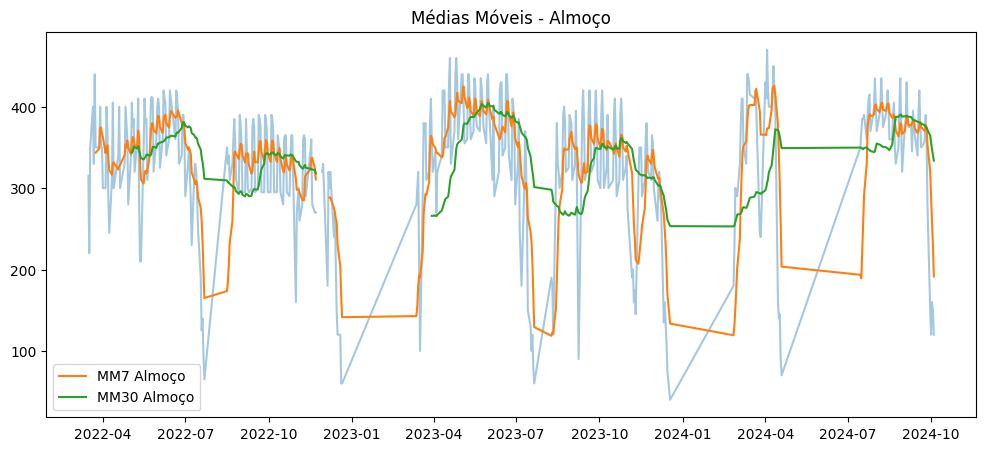

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df['Data'], df['Comensais_almoço'], alpha=0.4)
plt.plot(df['Data'], df['MM7_almoço'], label='MM7 Almoço')
plt.plot(df['Data'], df['MM30_almoço'], label='MM30 Almoço')
plt.legend(); plt.title('Médias Móveis - Almoço')

Text(0.5, 1.0, 'Médias Móveis - Janta')

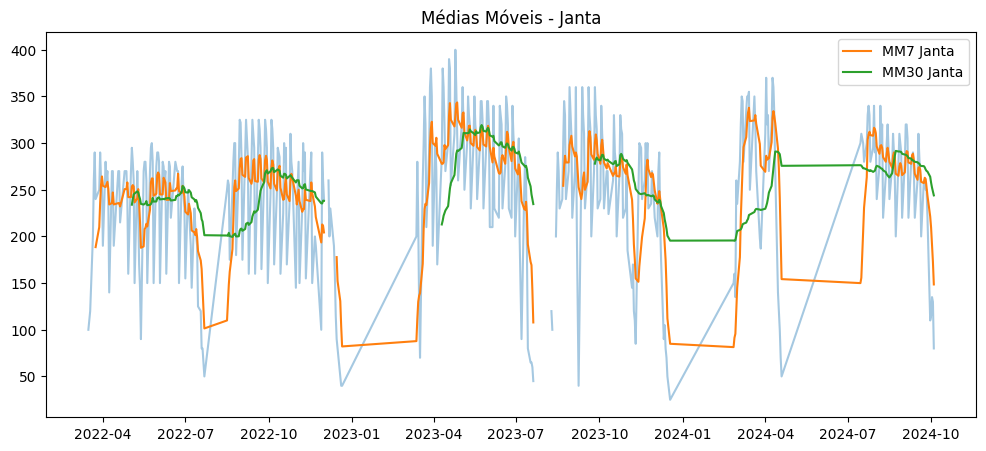

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df['Data'], df['Comensais_janta'], alpha=0.4)
plt.plot(df['Data'], df['MM7_janta'], label='MM7 Janta')
plt.plot(df['Data'], df['MM30_janta'], label='MM30 Janta')
plt.legend(); plt.title('Médias Móveis - Janta')

## Sazonalidade (Média por mês e por dia da semana)

In [14]:
df['Mes'] = df['Data'].dt.month
df['DiaSemana'] = df['Data'].dt.day_name()
df.groupby('Mes')[['Comensais_almoço','Comensais_janta']].mean()

,Comensais_almoço,Comensais_janta
Mes,,
2,251.250000,176.250000
3,345.833333,263.333333
4,347.959184,267.857143
5,378.454545,274.659091
6,378.250000,265.500000
7,278.809524,206.707317
8,353.000000,268.918367
9,349.161290,268.629032
10,320.930233,250.674419


Text(0.5, 1.0, 'Sazonalidade Mensal')

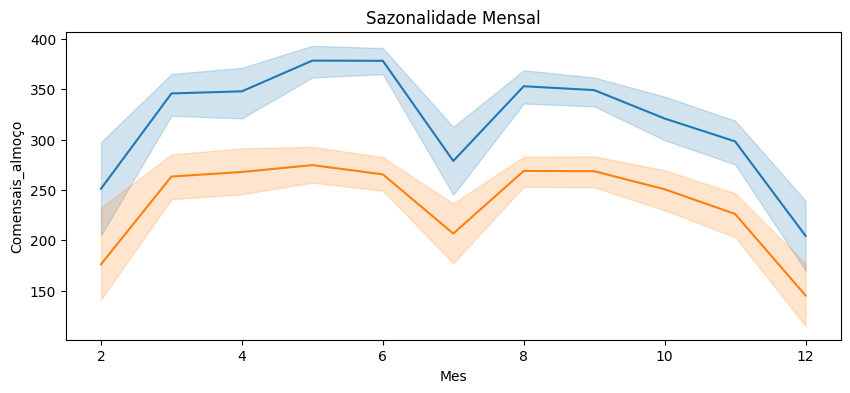

In [15]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Mes', y='Comensais_almoço')
sns.lineplot(data=df, x='Mes', y='Comensais_janta')
plt.title('Sazonalidade Mensal')

## Outliers (Boxplots)

Text(0.5, 1.0, 'Boxplot de Outliers')

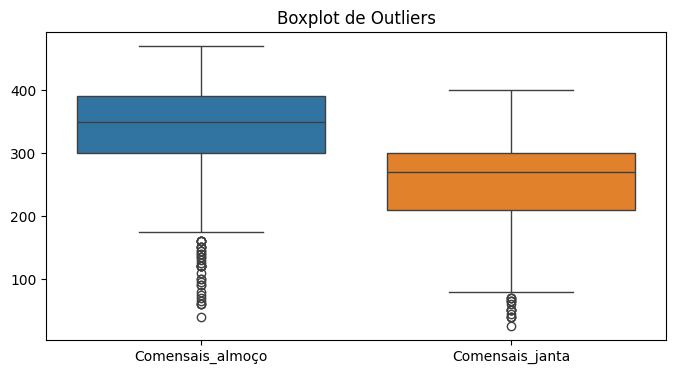

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[['Comensais_almoço','Comensais_janta']])
plt.title('Boxplot de Outliers')